In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import argparse

In [4]:
def plot_metrics(log_path,num_ag):
    df = pd.read_csv(log_path)
    agents = range(num_ag)
    metrics = ["episode_return", "extract_gold", "mine_gold", "mine_iron"]

    fig, axes = plt.subplots(1, len(metrics), figsize=(20, 6), sharey=False)

    for idx, metric in enumerate(metrics):
        y_mean = []
        y_ste = []
        for agent_idx in agents:
            col = f"{metric}_{agent_idx+1}" if metric != "episode_return" else f"agent_{agent_idx}/{metric}"
            Y = pd.to_numeric(df[col], errors='coerce').dropna()
            y_mean.append(Y.mean())
            y_ste.append(Y.std() / np.sqrt(len(Y)))

        x = np.arange(len(agents))
        axes[idx].bar(x, y_mean, yerr=y_ste, capsize=6, alpha=0.7)
        axes[idx].set_xticks(x)
        axes[idx].set_xticklabels([f"Agent {i}" for i in agents])
        axes[idx].set_title(metric.replace("_", " ").title())
        axes[idx].grid(axis='y', linestyle='--', alpha=0.6)

    fig.suptitle("Agent Metrics: Mean with Standard Error", fontsize=16)
    plt.tight_layout()
    plt.show()

In [9]:
def plot_metrics_2group(log_path1,log_path2,num_ag,group_labels=("Group 1", "Group 2"), colors=("C0","C1")):
    df1 = pd.read_csv(log_path1)
    df2 = pd.read_csv(log_path2)

    agents = list(range(num_ag))
    metrics = ["episode_return", "extract_gold", "mine_gold", "mine_iron"]

    def per_agent_stats(df, metric):
        means, stes = [], []
        for agent_idx in agents:
            # Column naming follows your original convention:
            # - episode_return: "agent_{k}/episode_return" (k is 0-based in your original logs)
            # - others: "{metric}_{k+1}"
            col = f"{metric}_{agent_idx+1}" if metric != "episode_return" else f"agent_{agent_idx}/{metric}"
            if col not in df.columns:
                # If column missing, fill with NaN so it shows as empty/masked
                means.append(np.nan)
                stes.append(np.nan)
                continue
            Y = pd.to_numeric(df[col], errors='coerce').dropna()
            if len(Y) == 0:
                means.append(np.nan)
                stes.append(np.nan)
            else:
                means.append(Y.mean())
                stes.append(Y.std(ddof=1) / np.sqrt(len(Y)))
        return np.array(means), np.array(stes)

    fig, axes = plt.subplots(1, len(metrics), figsize=(20, 6), sharey=False)

    bar_width = 0.38
    x = np.arange(len(agents))

    for idx, metric in enumerate(metrics):
        ax = axes[idx]
        m1, e1 = per_agent_stats(df1, metric)
        m2, e2 = per_agent_stats(df2, metric)

        ax.bar(x - bar_width/2, m1, yerr=e1, capsize=6, alpha=0.85, width=bar_width, label=group_labels[0], color=colors[0])
        ax.bar(x + bar_width/2, m2, yerr=e2, capsize=6, alpha=0.85, width=bar_width, label=group_labels[1], color=colors[1])

        ax.set_xticks(x)
        ax.set_xticklabels([f"Agent {i+1}" for i in agents], rotation=0)
        ax.set_title(metric.replace("_", " ").title())
        ax.grid(axis='y', linestyle='--', alpha=0.6)
        ax.legend(frameon=False)

    fig.suptitle("Agent Metrics: Mean ± Standard Error", fontsize=16)
    plt.tight_layout()
    plt.show()

In [3]:
log_path_impala = f"/home/kumquat/Documents/Linfan/social-agents-JAX/results/PopArtIMPALA_1_meltingpot_coop_mining_2025-03-17_14:26:51.204572,./results/PopArtIMPALA_1_meltingpot_coop_mining_2025-03-17_14:26:51.204572,./results/PopArtIMPALA_1_meltingpot_coop_mining_2025-03-14_14:39:21.229188,./results/PopArtIMPALA_1_meltingpot_coop_mining_2025-03-14_14:39:21.229188,./results/PopArtIMPALA_1_meltingpot_coop_mining_2025-03-17_14:26:51.204572,./results/PopArtIMPALA_1_meltingpot_coop_mining_2025-03-17_14:26:51.204572/csv_logs/meltingpot_coop_mining.csv" 
log_path_attn = f"/home/kumquat/Documents/Linfan/social-agents-JAX/results/PopArtIMPALA_attention_1_meltingpot_coop_mining_2025-09-04_01:34:46.303068,./results/PopArtIMPALA_attention_1_meltingpot_coop_mining_2025-06-10_21:32:15.740274,./results/PopArtIMPALA_attention_1_meltingpot_coop_mining_2025-05-28_00:34:00.259639,./results/PopArtIMPALA_attention_1_meltingpot_coop_mining_2025-05-28_00:34:00.259639,./results/PopArtIMPALA_attention_1_meltingpot_coop_mining_2025-05-28_00:34:00.259639,./results/PopArtIMPALA_attention_1_meltingpot_coop_mining_2025-06-10_21:32:15.740274/csv_logs/meltingpot_coop_mining.csv" 

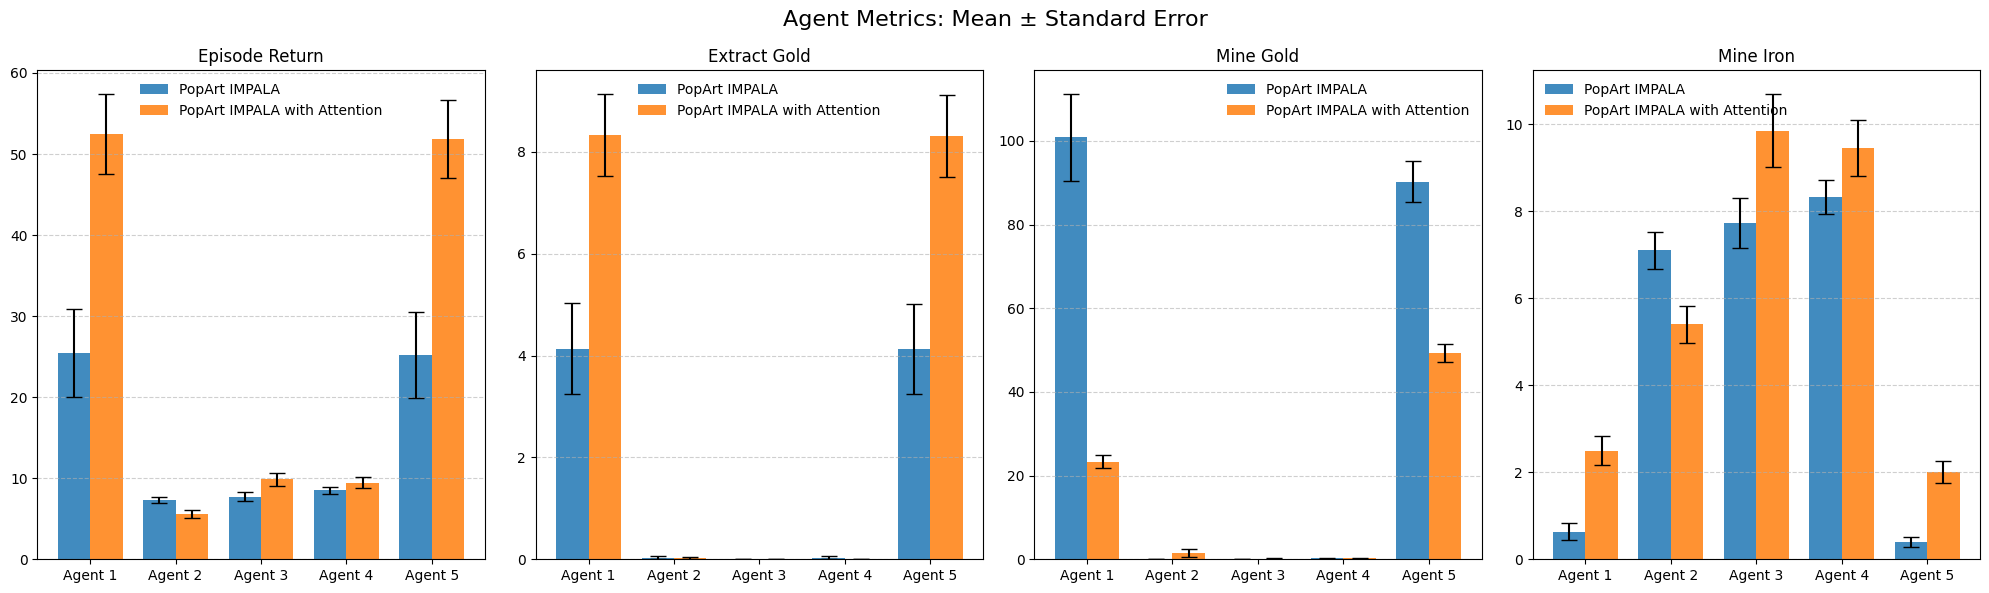

In [10]:
plot_metrics_2group(log_path_impala, log_path_attn, num_ag=5, group_labels=("PopArt IMPALA", "PopArt IMPALA with Attention"), colors=("C0", "C1"))

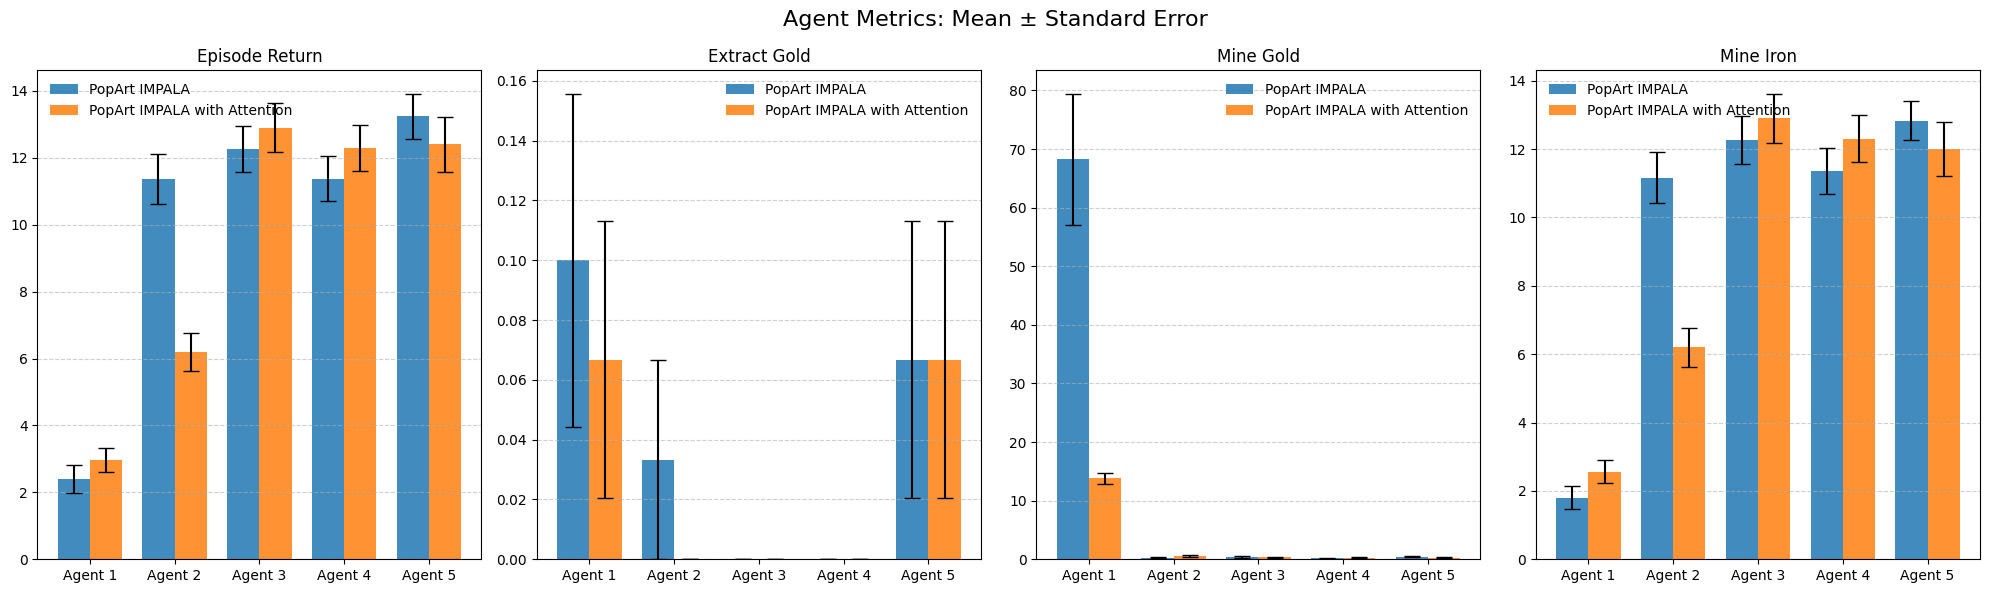

In [13]:
# single agent sceneraio 
log_path_impala = f"/home/kumquat/Documents/Linfan/social-agents-JAX/cross_eval_results/impala-all-single/csv_logs/meltingpot_coop_mining.csv"
log_path_attn = f"/home/kumquat/Documents/Linfan/social-agents-JAX/cross_eval_results/attention-all-single/csv_logs/meltingpot_coop_mining.csv"
plot_metrics_2group(log_path_impala, log_path_attn, num_ag=5, group_labels=("PopArt IMPALA", "PopArt IMPALA with Attention"), colors=("C0", "C1"))

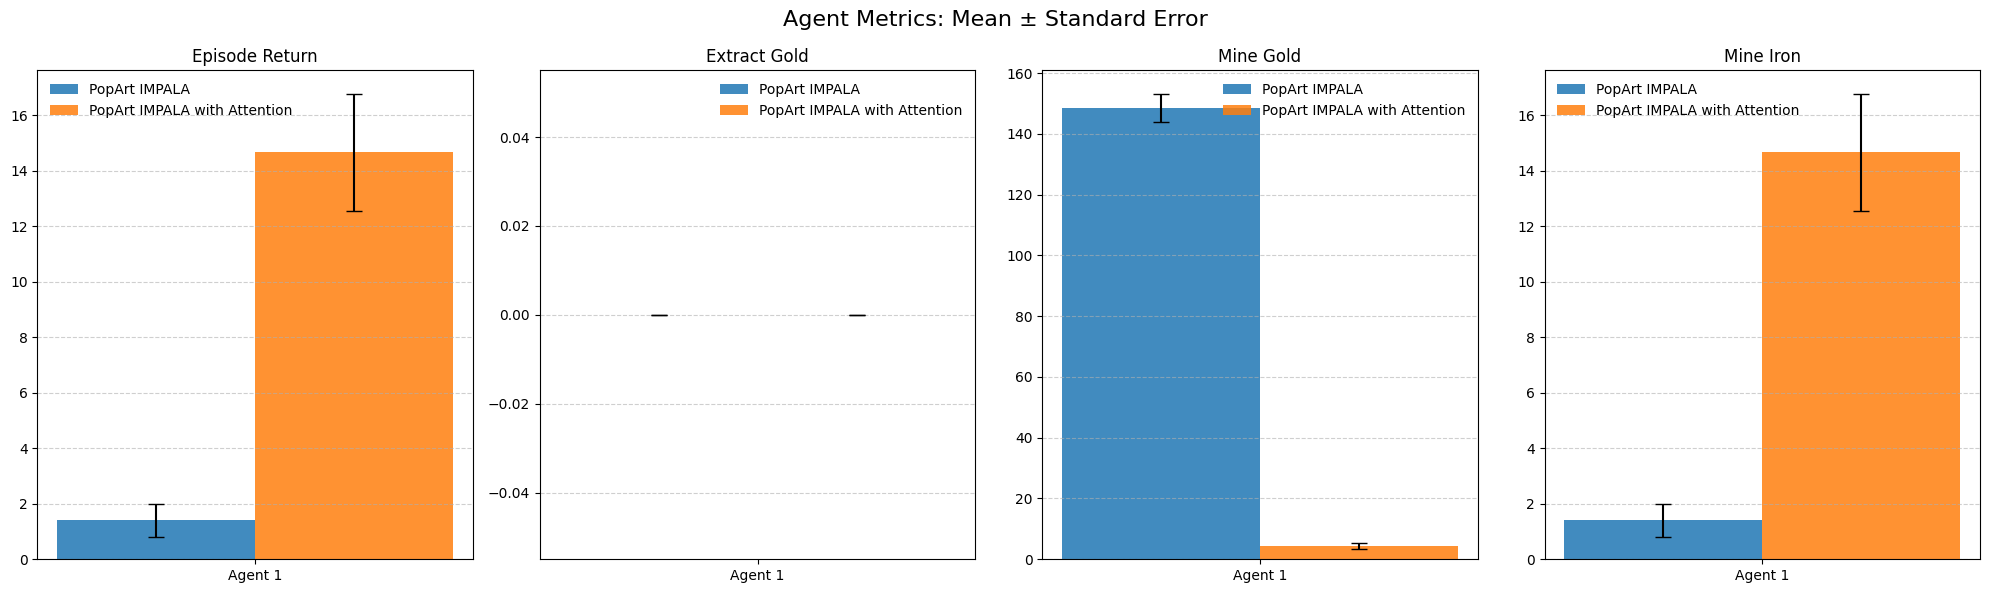

In [ ]:
# alone 
log_path_impala = f"/home/kumquat/Documents/Linfan/social-agents-JAX/cross_eval_results/impala-alone/csv_logs/meltingpot_coop_mining.csv"
log_path_attn = f"/home/kumquat/Documents/Linfan/social-agents-JAX/cross_eval_results/attention-alone/csv_logs/meltingpot_coop_mining.csv"
plot_metrics_2group(log_path_impala, log_path_attn, num_ag=1, group_labels=("PopArt IMPALA", "PopArt IMPALA with Attention"), colors=("C0", "C1"))